# **Case Study - Challenger Launch**

### **Importing the necessary libraries**

In [1]:
# Basic libraries of python for numeric and dataframe computations
import pandas as pd
import numpy as np

### **Loading the data**

In [2]:
data=pd.read_csv('challenger-data.csv')

**Now let us see the top five records of the rating data.**

In [3]:
data.head()

,Observation,Y,X
0,1,1,53
1,2,1,53
2,3,1,53
3,4,0,53
4,5,0,53


- X represent the temperature while the time of launch of the Rocket. 
- Y represents the whether an o-rings failure happened or not at the temperature.

Let's check the **info** of the data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Observation  120 non-null    int64
 1   Y            120 non-null    int64
 2   X            120 non-null    int64
dtypes: int64(3)
memory usage: 2.9 KB


- The data is comprised of 120 non-null values.

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Observation,120.0,60.500000,34.785054,1.0,30.75,60.5,90.25,120.0
Y,120.0,0.083333,0.277544,0.0,0.00,0.0,0.00,1.0
X,120.0,70.000000,7.100716,53.0,67.00,70.0,75.25,81.0


- The average temperature at which launch usually happens is 70 fahrenheit.

### **Visualizing	the	Data**

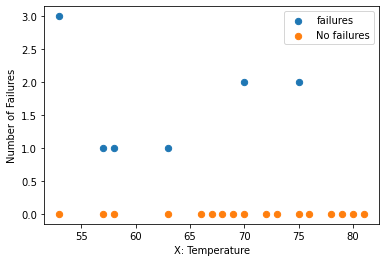

In [10]:
# We will be using the Matplotlib library for plotting.

# subsetting the data
failures = data.loc[(data.Y == 1)]
no_failures	= data.loc[(data.Y == 0)]

# frequencies
failures_freq = failures.X.value_counts() #failures.groupby('X')
no_failures_freq = no_failures.X.value_counts()

# plotting
import matplotlib as mpl
from matplotlib	import pyplot as plt
plt.scatter(failures_freq.index, failures_freq, s=40)
plt.scatter(no_failures_freq.index, np.zeros(len(no_failures_freq)), s=40)
plt.xlabel('X: Temperature')
plt.ylabel('Number of Failures')
plt.legend(['failures', 'No failures'])
plt.show()

- At higher temperatures there are very less chance for o-rings failures. 
- There is a chance where there is no o-ring failure below 55 temperature and other has 3 o-rings failures which creates a sense of doubt whether to go for it or not. 

### **Logistic Regression**


In [13]:
# You will need to have the following libraries installed before proceeding:
import statsmodels.formula.api as SM

# Build the model
model = SM.logit(formula='Y~X',data=data)
result = model.fit()

# Summarize the model
print (result.summary())

Optimization terminated successfully.
         Current function value: 0.242411
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                  120
Model:                          Logit   Df Residuals:                      118
Method:                           MLE   Df Model:                            1
Date:                Sun, 26 Feb 2023   Pseudo R-squ.:                  0.1549
Time:                        11:49:44   Log-Likelihood:                -29.089
converged:                       True   LL-Null:                       -34.420
Covariance Type:            nonrobust   LLR p-value:                  0.001094
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4049      3.041      2.435      0.015       1.445      13.365
X             -0.1466      0.

- We now have the model and the summaries should provide the coefficient, intercept, standard errors and p-values. 
- The Negative coefficient for X determines if the the temperate lowers by 1 there is ~15% chance for o-ring failure.
- p have for both intercept and X signifies that they are statistically significant and temperature does effect the change of an o-ring failure.